# 📈 Crypto price tracker with charts

In [1]:
import requests
import pandas as pd
import mplfinance as mpf
from bloxs import B

In [2]:
symbol = "BTCUSDT"

In [3]:
def get_data(symbol):
    response = requests.get(f"https://www.binance.com/api/v1/klines?symbol={symbol}&interval=1h&limit=48")
    candles = response.json()
    df = pd.DataFrame(candles, columns=["Open time", "Open", "High", "Low", "Close", "Volume", 
                                    "Close time", "Quote", "Trades", "BaseVol", "QuoteVol", "Igonre"])
    df["Date"] = pd.to_datetime(df["Open time"], unit='ms')
    for col in ["Open", "High", "Low", "Close", "Volume"]:
        df[col] = df[col].astype(float)
    df = df.set_index('Date')
    return df

In [4]:
df = get_data(symbol)

In [5]:
latest_price = df["Close"][-1]
price_chanage_24hours = (df["Close"][-2] - df["Close"][-24]) / df["Close"][-2] * 100.0
volume_change_24hours = (df["Volume"][-2] - df["Volume"][-24]) / df["Volume"][-2] * 100.0

In [6]:
B([
    B(f"{int(df['Close'][-1]):,}", "Latest price"),
    B(f"{price_chanage_24hours:.2f}%", "24h % price change"),
    B(f"{volume_change_24hours:.2f}%", "24h % volume change"),
    
    
])

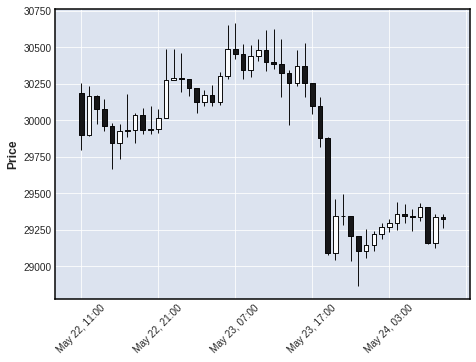

In [7]:
mpf.plot(df, type='candle')